In [2]:
import math as m
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

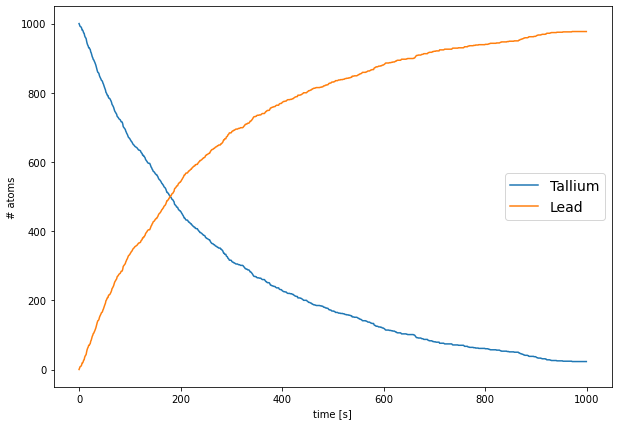

In [3]:
tau = 3.052     # minutes
Tl = [1000]
Pb = [0]
t_step = 1      # second

# tau in seconds
tau = tau * 60

# time 
time = np.arange(0, 1000, t_step)
prob = npr.rand(Tl[0])  # probability of decay for each atom

# probability of decay
def p(t):
    return 1 - 2**(-t / tau)

for i in range(len(time) - 1):
    pr = p(time[i + 1])   # probability of decay at time t 
    n_decay = np.sum(np.where(prob >= pr, 0, 1))    # count the number of decayed atoms
    
    Tl.append(Tl[0] - n_decay)
    Pb.append(Pb[0] + n_decay)

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(time, Tl, label = 'Tallium')
ax.plot(time, Pb, label = 'Lead')
ax.set_xlabel('time [s]')
ax.set_ylabel('# atoms')
ax.legend(fontsize = 14)

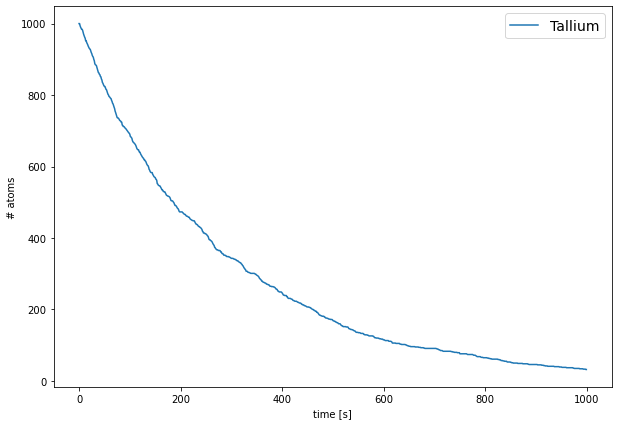

In [4]:
def icdf(z):    # inverse cdf (quantile function)
    return -tau * np.log2(1-z)

z = npr.rand(1000)
v = icdf(z)
Tl = [1000]

for i in range(len(time) - 1):
    n_decay = np.sum(np.where(v > time[i], 0, 1))
    Tl.append(Tl[0] - n_decay)


fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(time, Tl, label = 'Tallium')
ax.set_xlabel('time [s]')
ax.set_ylabel('# atoms')
ax.legend(fontsize = 14)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [15]:
Z = 79   
a0 = 5.29 * 1e-11   # m
sigma = a0 / 100
e = 1.6 * 1e-19
e0 = 8.85 * 1e-12
E = 7.7 * e * 1e6

n_alpha = 10**6     # number pf alpha particle

# generate the beam
cov_matrix = np.array([[sigma**2, 0], [0, sigma**2]])
beam = npr.multivariate_normal([0, 0], cov_matrix, n_alpha)

# impact parameters
b = np.sqrt(beam[:, 0]**2 + beam[:, 1]**2)

# scattering angle
def theta(b):
    return np.arctan(Z * e**2 / (2 * m.pi * e0 * E * b)) * 2

sc_angles = theta(b)    # scattering angles for every impact parameter

n_bounce = np.sum(np.where(sc_angles > m.pi/2, 1, 0))   # number of particles that bounce back

print(f'The fraction of particles that bounce back is {n_bounce/n_alpha * 100} %')

The fraction of particles that bounce back is 0.1507 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The integral computed with the hit/miss method is: 1.451 +/- 0.003
The integral computed with the mean value method is: 1.449 +/- 0.002
the compatibility of the two methods is: 0.64


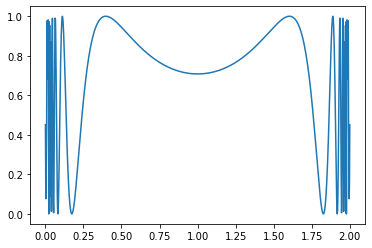

In [22]:
def f(x):
    return (np.sin(1 / (x * (2 - x))))**2

x_range = np.linspace(.001, 1.999, 1000)

plt.plot(x_range, f(x_range))

# hit/miss method
N = 100000
count = 0
for i in range(N):
    x = 2*npr.random()    # x from 0 to 2
    y = npr.random()
    if y < f(x): count+=1
I = 2*count / N     # area under the function
p = I / 2           # probability for a point to fall under the function
err_p = np.sqrt(N * p * (1 - p))
err_I = 2 * err_p / N

print(f'The integral computed with the hit/miss method is: {I:.3f} +/- {err_I:.3f}')

# mean value method
b = 2
a = 0

x_mv = 2 * npr.random(N)
mean_f_mv = 1 / N * np.sum(f(x_mv))
I_mv = (b - a) * mean_f_mv
err_I_mv = (b - a) * np.std(f(x_mv)) / m.sqrt(N)

print(f'The integral computed with the mean value method is: {I_mv:.3f} +/- {err_I_mv:.3f}')

# compatibility of the two methods
comp = abs(I - I_mv) / m.sqrt(err_I**2 + err_I_mv**2)

print(f'the compatibility of the two methods is: {comp:.2f}')

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [28]:
def f(x):
    if np.sum(x**2) <= 1:
        return 1
    else:
        return 0

N = 1000000

def volume(Ndim):
    a = -1
    b = 1
    V = (b - a) ** Ndim
    # hit/miss method
    count = 0
    for i in range(N):
        x = 2 * npr.random(Ndim) - 1    # random numbers from -1 to 1
        area = f(x)
        if area == 1:
            count+=1

    return V * count / N

print(f'Area of a circle with radius 1 is: {volume(2)}')
print(f'Volume of a sphere with radius 1 is: {volume(3)}')
print(f'Volume of a sphere in 10 dim with radius 1 is: {volume(10)}')


Area of a circle with radius 1 is: 3.141208
Volume of a sphere with radius 1 is: 4.179248
Volume of a sphere in 10 dim with radius 1 is: 2.51392


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [33]:
def f(x):
    return x**(-0.5) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

def quantile_w(z):
    return z**2 / 4

int_w = 2   # integral of w(x) from 0 to 1

N = 1000000

# sample random from w
x = quantile_w(npr.random(N))

I = 1 / N * np.sum(f(x) / w(x)) * int_w

print(f'The integral is: {I:.3f}')

The integral is: 0.958
